In [28]:
## Learning Rate vs Epoch analysis of single layer neural net
import numpy as np
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [30]:
## Store tanh and sigmoid perceptron output files (with learning rate appended to file name) in hash
data_path = os.getcwd() + '/Output'
df_container = pd.DataFrame()

for doc in os.listdir(data_path):
    #print(file)
    file = data_path+"/"+doc
    if bool(re.match(re.compile("tanh."),doc)):
        f = open(file, "r")
        alpha = f.readline().split(":")[1].strip()
        index = alpha + "_tanh"
        df_container[index]= pd.read_csv(file,skiprows=1)["ABS_ERROR"]
        f.close()
    elif bool(re.match(re.compile("sigmoid."),doc)):
        f = open(file, "r")
        alpha = f.readline().split(":")[1].strip()
        index = alpha + "_sigmoid"
        df_container[index]= pd.read_csv(file,skiprows=1)["ABS_ERROR"]
        f.close()
df_container["EPOCH"] = df_container.index
df_container = df_container.set_index("EPOCH")
df_container

,1_tanh,100_tanh,0.1_tanh,100_sigmoid,1_sigmoid,0.1_sigmoid
EPOCH,,,,,,
0,3.000000,3.0,3.000000,2.000000,2.000000,2.000000
1,0.995238,1.0,1.762710,1.000000,1.658410,1.964760
2,0.988985,1.0,1.481190,0.978942,1.469550,1.930960
3,0.974570,1.0,1.344870,0.000737,1.354870,1.898580
4,0.941562,1.0,1.259720,0.000721,1.277570,1.867600
...,...,...,...,...,...,...
9996,0.000337,1.0,0.003385,0.000009,0.004056,0.041172
9997,0.000337,1.0,0.003385,0.000009,0.004055,0.041168
9998,0.000337,1.0,0.003385,0.000009,0.004055,0.041164


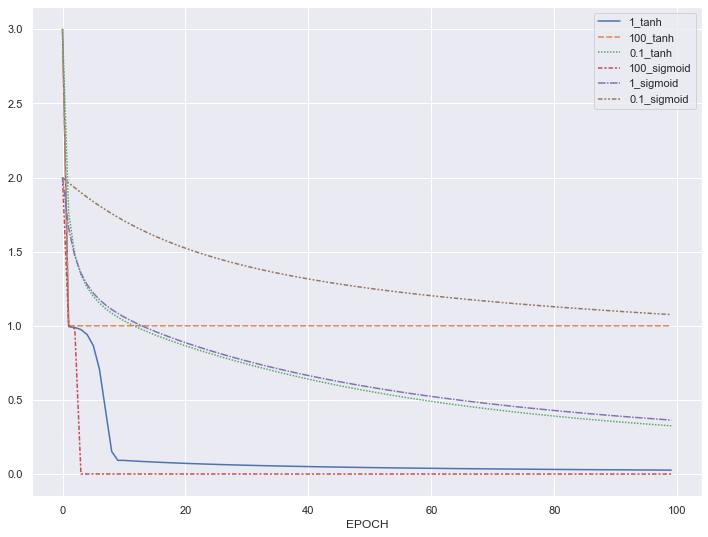

In [36]:
#fig, ax = plt.subplots()
#sig_df = [df_container["1_sigmoid"][:50], df_container["100_sigmoid"][:50], df_container["0.1_sigmoid"][:50]]
fig, ax = plt.subplots()
fig.set_size_inches(12,9)

sns.lineplot(data=df_container[:100])